In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
data = pd.read_csv("C:/Users/charl/Downloads/iris/iris.csv")

In [4]:
data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [5]:
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'label']
df = pd.DataFrame(data)
df.columns = columns
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  4.9               3.0                1.4               0.2   
1                  4.7               3.2                1.3               0.2   
2                  4.6               3.1                1.5               0.2   
3                  5.0               3.6                1.4               0.2   
4                  5.4               3.9                1.7               0.4   
..                 ...               ...                ...               ...   
144                6.7               3.0                5.2               2.3   
145                6.3               2.5                5.0               1.9   
146                6.5               3.0                5.2               2.0   
147                6.2               3.4                5.4               2.3   
148                5.9               3.0                5.1               1.8   

              label  
0    

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['label']=le.fit_transform(data['label'])

In [12]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [15]:
data.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
label                 3
dtype: int64

In [16]:
# 결측치 확인
missing_values = data.isnull().sum()

# 결측치 출력
print("결측치 확인:\n", missing_values)

결측치 확인:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
label                0
dtype: int64


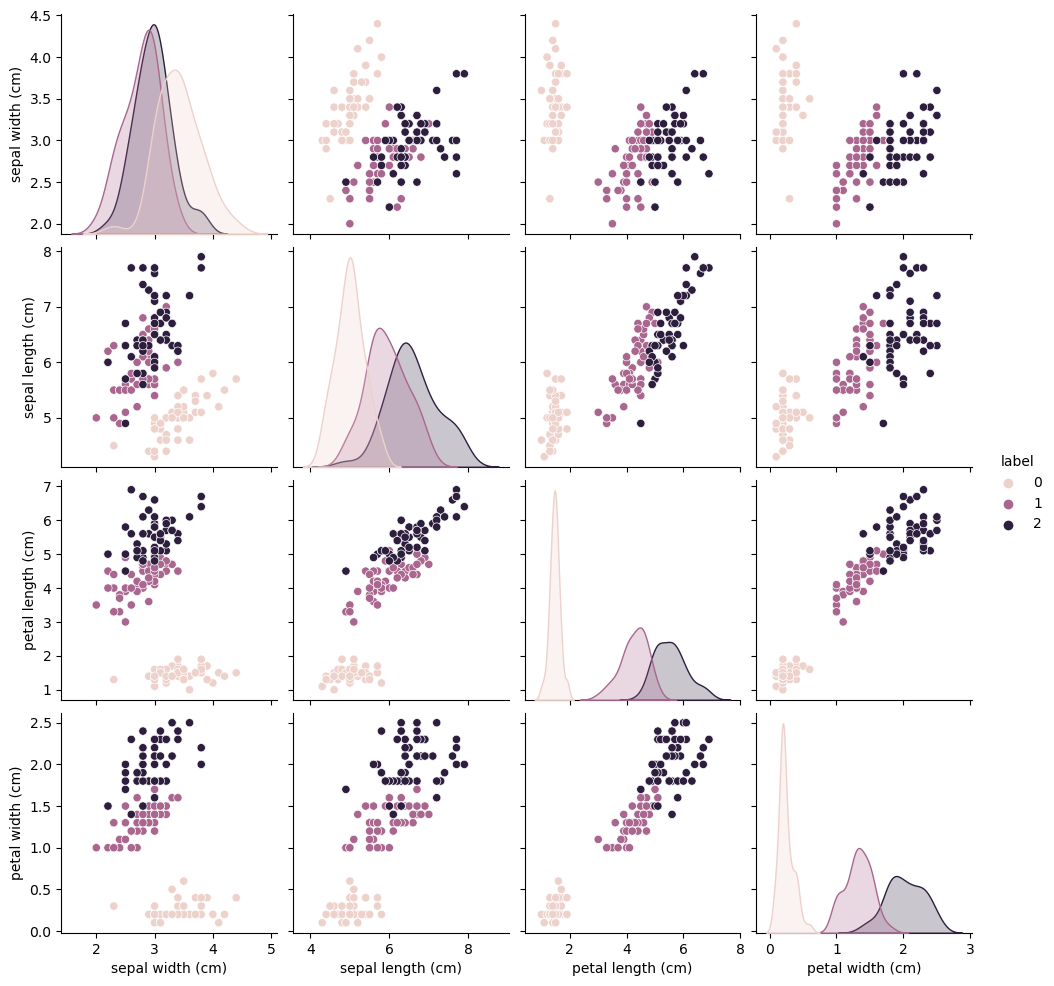

In [13]:
import seaborn as sns

sns.pairplot(data,
             vars=['sepal width (cm)','sepal length (cm)','petal length (cm)','petal width (cm)'],
            hue ='label')
plt.show()

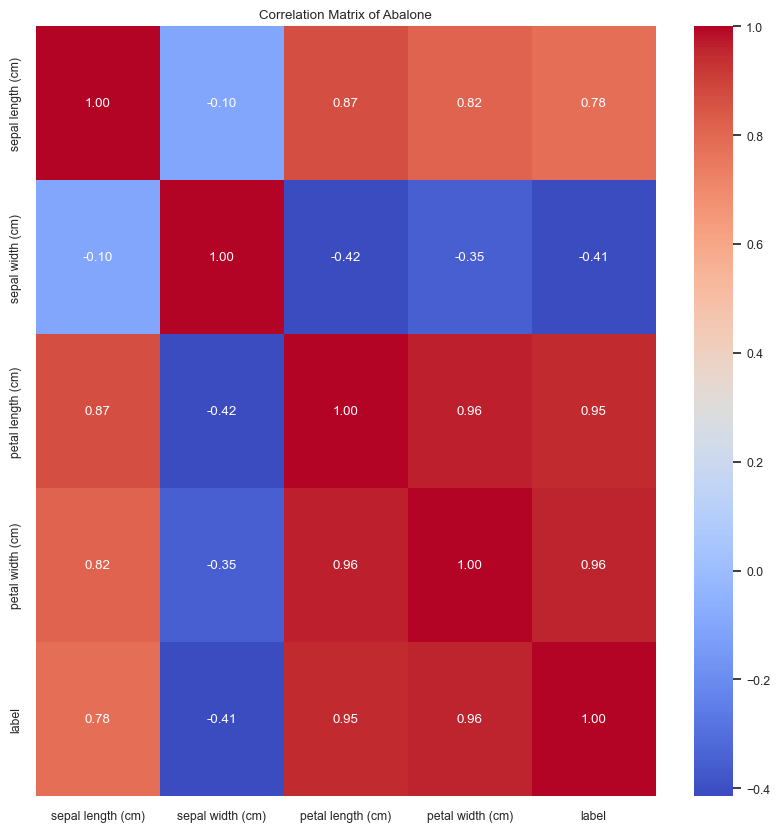

In [14]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(data_corr, annot=True, cbar=False)
plt.title('Correlation Matrix of Abalone')
plt.show()

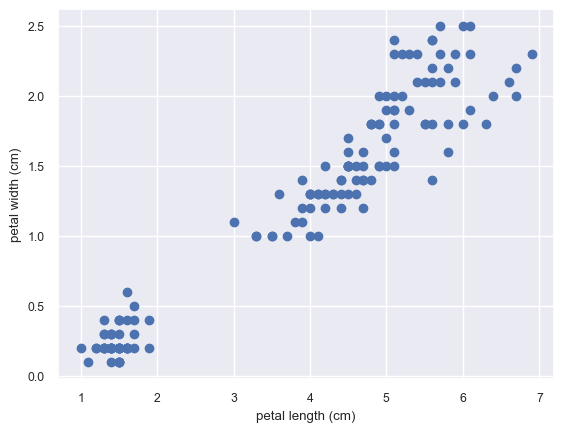

In [17]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

plt.show()

In [18]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')

In [19]:
X = df.drop('label',axis=1)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [20]:
y = df['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [21]:
Y = pd.get_dummies(y).values

In [22]:
X = X.values

In [23]:
X

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5. , 3

In [24]:
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((119, 4), (119, 3), (30, 4), (30, 3))

In [39]:
# Check the shape of your input data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Check the shape of your label data
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (119, 4)
X_test shape: (30, 4)
y_train shape: (119, 3)
y_test shape: (30, 3)


In [40]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(10,input_shape=(4,),activation='softmax'))
#input_shaep : X_train의 shape
model.add(Dense(10,activation='softmax'))
model.add(Dense(10,activation='softmax'))
model.add(Dense(3,activation='softmax'))
#마지막 Dense : y_train의 label
model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 10)                50        
                                                                 
 dense_21 (Dense)            (None, 10)                110       
                                                                 
 dense_22 (Dense)            (None, 10)                110       
                                                                 
 dense_23 (Dense)            (None, 3)                 33        
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
4/4 [==============================] - 0s 47ms/step - loss: 1.1010 - accuracy: 0.3277 - val_loss: 1.1236 - val_accuracy: 0.2667
Epoch 2/30
4/4 [==============================] - 0s 8ms/step - loss: 1.1033 - accuracy: 0.3529 - val_loss: 1.1176 - val_accuracy: 0.2667
Epoch 3/30
4/4 [==============================] - 0s 9ms/step - loss: 1.1006 - accuracy: 0.3529 - val_loss: 1.1019 - val_accuracy: 0.2667
Epoch 4/30
4/4 [==============================] - 0s 8ms/step - loss: 1.0987 - accuracy: 0.2689 - val_loss: 1.0979 - val_accuracy: 0.3333
Epoch 5/30
4/4 [==============================] - 0s 9ms/step - loss: 1.0864 - accuracy: 0.3193 - val_loss: 1.0854 - val_accuracy: 0.2667
Epoch 6/30
4/4 [==============================] - 0s 9ms/step - loss: 1.0684 - accuracy: 0.4202 - val_loss: 1.0455 - val_accuracy: 0.6667
Epoch 7/30
4/4 [==============================] - 0s 7ms/step - loss: 1.0194 - accuracy: 0.6639 - val_loss: 0.9695 - val_accuracy: 0.6667
Epoch 8/30
4/4 [=================

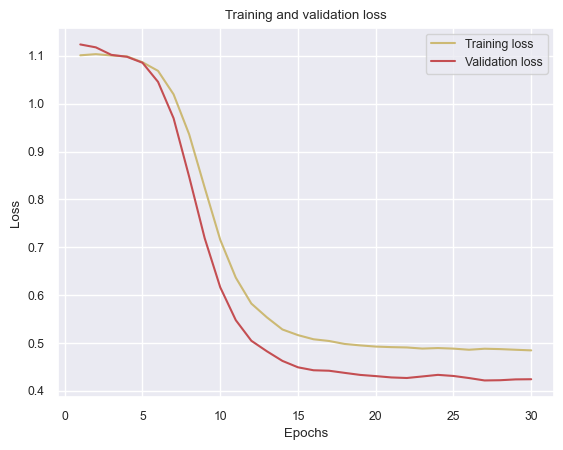

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

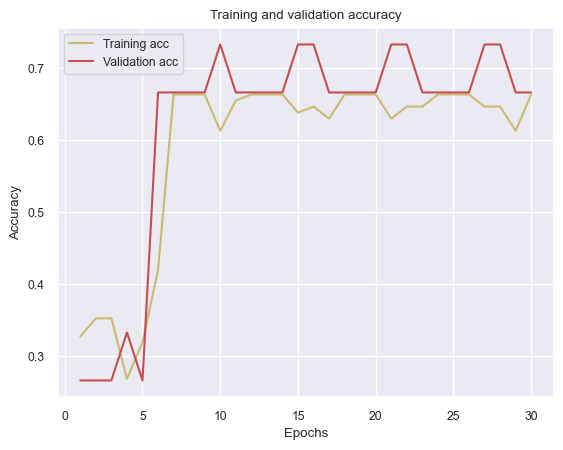

In [42]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [43]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.00      0.00      0.00        10
           2       0.44      1.00      0.62         8

    accuracy                           0.67        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.52      0.67      0.56        30

[[12  0  0]
 [ 0  0 10]
 [ 0  0  8]]


C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
